### importing some important library

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array , load_img
import cv2
import matplotlib.image as mpimg
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import glob

# install the librery

because we want to split our data to test and train set we should impliment a new librery
split folders do this

In [21]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import splitfolders

# split data

split all the images in DataSet folder and then save's them to NewDataset folder
80% is train nad 20% is test

In [3]:
splitfolders.ratio("DataSet", output="NewDataset",
    seed=1337, ratio=(.8, 0,.2), group_prefix=None, move=False)

Copying files: 624 files [00:03, 170.87 files/s]


# setting the File path

In [5]:
test_path = "NewDataset/test/"
train_path = "NewDataset/train/"

# Load a train image

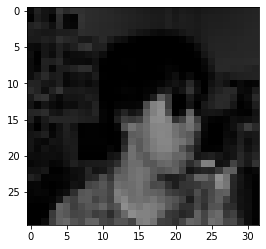

In [6]:
img = image.load_img(train_path + "Glasses/an2i_left_sad_sunglasses_4.pgm")
plt.imshow(img) 
plt.show()

# Train set loading

because of the data set images format we couldn't load data set with tensorflow and ... so i load it with pour python code with glob function and then i set the y train set of x with 1 = has sunglasses , 0 = hasn't sunglasses

In [9]:
Glass_train = glob.glob("NewDataset/train/Glasses/*")
NoGlass_train = glob.glob("NewDataset/train/NoGlasses/*")
train_x_path = Glass_train + NoGlass_train
train_x = []
train_y = np.empty(499)
j = 0
for i in train_x_path:
    if j < 248:
        train_y[j] = 1
    else :
        train_y[j] = 0
    img = mpimg.imread(i)
    train_x.append(img)
    j+=1
    

# Test set loading


In [10]:
Glass_test = glob.glob("NewDataset/test/Glasses/*")
NoGlass_test = glob.glob("NewDataset/test/NoGlasses/*")
test_x_path = Glass_test + NoGlass_test
test_x = []
test_y = np.empty(125)
j = 0
for i in test_x_path:
    if j < 62:
        test_y[j] = 1
    else :
        test_y[j] = 0
    img = mpimg.imread(i)
    test_x.append(img)
    j+=1

# convert 
So after loading the data we know it shape is 30 * 32 and we have 499 images in train set and 125 images in test set
All of them have list format so we convert it to array 

In [11]:
train_x = np.asarray(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(499, 30, 32)
(499,)
(125, 30, 32)
(125,)


In [12]:
classes = ['Glasses',"non-Glasses"]

# Reshapeing 

we have 3D array and its really hard for us because mlp can't work with 3D or higher dimentional array so we reshape it to 2D array 

In [13]:
train_x_flatten = train_x.reshape(499,30*32)
test_x_flatten = test_x.reshape(test_x.shape[0],test_x.shape[1]*test_x.shape[2])

print ("train_set_x_flatten shape: " + str(train_x_flatten.shape))
print ("train_set_y shape: " + str(train_y.shape))
print ("test_set_x_flatten shape: " + str(test_x_flatten.shape))
print ("test_set_y shape: " + str(test_y.shape))

train_set_x_flatten shape: (499, 960)
train_set_y shape: (499,)
test_set_x_flatten shape: (125, 960)
test_set_y shape: (125,)


# Modeling

Now we can model our data with SKLearn librery 
+ hidden_layer_size :The ith element represents the number of neurons in the ith hidden layer. for example (10,10,10) it means we have 3 hidden layer and in each layer we have 10 nodes
+ Max-iter :Maximum number of iterations.
+ activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
+ Learning_rate : alpha
.....

In [14]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes = (256,128,64,32,),max_iter=500, activation='relu',learning_rate="adaptive",solver="adam")
mlp

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), learning_rate='adaptive',
              max_iter=500)

In [15]:
mlp.fit(train_x_flatten,train_y)

MLPClassifier(hidden_layer_sizes=(256, 128, 64, 32), learning_rate='adaptive',
              max_iter=500)

In [16]:
pred = mlp.predict(test_x_flatten)
pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [17]:
print(test_y)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [18]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(test_y,pred))
print(accuracy_score(test_y, pred))

[[59  4]
 [ 4 58]]
0.936


In [19]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        63
         1.0       0.94      0.94      0.94        62

    accuracy                           0.94       125
   macro avg       0.94      0.94      0.94       125
weighted avg       0.94      0.94      0.94       125



Now we check it for 2, 4, 10, 50 node in hidden layer so we can see the result

In [20]:
element_num = [2,4,10,50]
for i in element_num:
    testmlp = MLPClassifier(hidden_layer_sizes = (i,),max_iter=500, activation='relu',learning_rate="adaptive",solver="adam")
    testmlp.fit(train_x_flatten,train_y)
    pred_test = testmlp.predict(test_x_flatten)
    print("with " + str(i) +" element in hidden layer accuracy_score is : ",accuracy_score(test_y, pred_test))

with 2 element in hidden layer accuracy_score is :  0.496
with 4 element in hidden layer accuracy_score is :  0.496
with 10 element in hidden layer accuracy_score is :  0.8
with 50 element in hidden layer accuracy_score is :  0.84


# 3 Layer (2 hidden ,1 output)

In [21]:
Newmlp = MLPClassifier(hidden_layer_sizes = (100,100,),max_iter=500, activation='relu',learning_rate="adaptive",solver="adam")
Newmlp.fit(train_x_flatten,train_y)
Newpred = Newmlp.predict(test_x_flatten)
print(accuracy_score(test_y, Newpred))

0.912


# 4 Layer (3 hidden ,1 output)

In [22]:
Newmlp = MLPClassifier(hidden_layer_sizes = (128,64,32,),max_iter=500, activation='relu',learning_rate="adaptive",solver="adam")
Newmlp.fit(train_x_flatten,train_y)
Newpred = Newmlp.predict(test_x_flatten)
print(accuracy_score(test_y, Newpred))

0.904


# 5 Layer (4 hidden ,1 output)

In [23]:
Newmlp = MLPClassifier(hidden_layer_sizes = (256,128,64,32,),max_iter=500, activation='relu',learning_rate="adaptive",solver="adam")
Newmlp.fit(train_x_flatten,train_y)
Newpred = Newmlp.predict(test_x_flatten)
print(accuracy_score(test_y, Newpred))

0.952
